In [1]:
using Plots

In [2]:
using Distributions

# Predictive Maintainance

We try to understand how this stochastic function behaves by calculating the mean over 1000 points.

In [145]:
# Total machines
N = 1000;

# Working machines at day 0
W_0 = 990;

# maintainance -> probability of breaking
Pb1 = 0.001;
Pb0 = 0.4;
Pb(m) = Pb1*m+Pb0*(1-m);

# probability of being repaired
Pr = 0.5;

# Income
I(m) = 0.6*m + 1*(1-m);

# Cost of repair
C = 4;

function simulate(m, n)
    a = 0
    for i = 1:n
        B = rand(Binomial(W_0, Pb(m)));
        R = rand(Binomial(N-W_0, Pr));
        W_1 = W_0 - B + R;
        M = W_1*I(m) - R*C;
        a = a + M;
    end
    return a / n
end
xs = collect(0:1e-2:1);

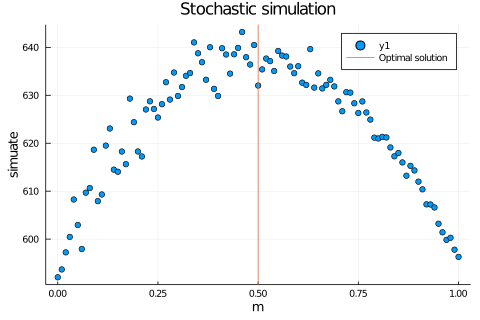

In [152]:
ys = [simulate(m, 10) for m in xs]
scatter(xs, ys, dpi=20, xlabel="m", ylabel="simuate", title="Stochastic simulation")
vline!([0.5], label="Optimal solution")

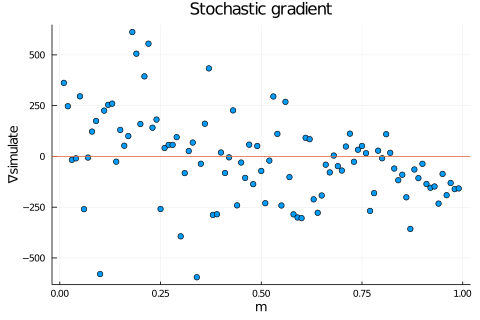

In [153]:
simulate_prime(m, c) = (simulate(m+c, 10)-simulate(m-c, 10))/2e-2
scatter(xs[2:end-1], m -> simulate_prime(m, 1e-2), dpi=20, xlabel="m", ylabel="∇simulate", title="Stochastic gradient",legend=false)
hline!([0], label="Critical point")

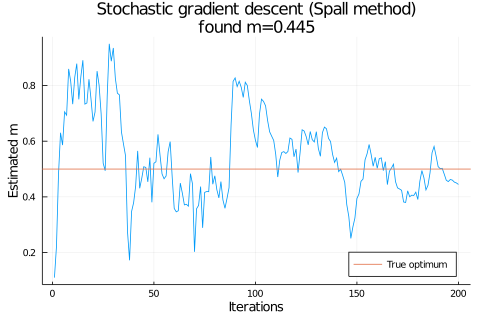

In [159]:
m0 = 0.1
ms = []
A = 10
B = 100
C = 1e-2
l = 2
t = 1e-2
for i in 1:200
    μ = A/(B+i)^l
    m0 = m0 + μ * simulate_prime(m0, C/(i^t))
    push!(ms, m0)
end
plot(ms,
    dpi=20,
    xlabel="Iterations",
    ylabel="Estimated m",
    title="Stochastic gradient descent (Spall method)\nfound m=$(round(ms[end], digits=3))",
    label=false
)
hline!([0.5], label="True optimum",legend=:bottomright)